# MVP : NY Health Inspection/Demographic/Reviews Data Project
- still need reviews/census data

# ACQUISITION

## Imports used

In [1]:
%load_ext autoreload
%autoreload 2

# Imported libraries
import acquire as a
import prepare as p
import explore as e
import os
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marc_aradillas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/marc_aradillas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Aquisition function that pulls data currently stored or requests the data from socrata

In [2]:
ny = p.final_ny()

In [3]:
ny

,camis,dba,boro,phone,inspection_date,latitude,longitude,cuisine_description,action,score,grade,full_address,violation_code,violation_description
0,41168748,DUNKIN,Bronx,7188614171,2022-03-30T00:00:00.000,40.816753,-73.892364,Donuts,Violations cited,13,A,880 GARRISON AVENUE 10474,10J 04N 08A,Hand wash sign not posted Filth flies or food/...
1,41688142,TABLE 87,Brooklyn,9176186100,2017-01-25T00:00:00.000,40.683447,-73.975691,Pizza,No violations,0,A,620 ATLANTIC AVENUE 11217,No violation,No violation
2,50100336,SUBWAY,Brooklyn,7186808808,2022-04-05T00:00:00.000,40.622569,-74.031412,Sandwiches,Violations cited,10,A,8711 3 AVENUE 11209,09B 10F 06D,Thawing procedures improper. Non-food contact ...
3,50086686,GERTIE,Brooklyn,7186360902,2021-08-25T00:00:00.000,40.712360,-73.955419,American,No violations,0,A,58 MARCY AVENUE 11211,No violation,No violation
4,50081121,DUNKIN,Brooklyn,7182729090,2022-04-04T00:00:00.000,40.666827,-73.871606,Donuts,Violations cited,24,B,2492 LINDEN BOULEVARD 11208,10J 02G 04N 10F 08A,Hand wash sign not posted Cold food item held ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60820,50001313,NEW GOLDEN RESTAURANT,Brooklyn,7184346377,2021-08-11T00:00:00.000,40.634287,-73.949185,Chinese,Violations cited,5,A,1483 FLATBUSH AVENUE 11210,10F,Non-food contact surface improperly constructe...
60821,50064419,BURGER JOINT (INDUSTRY CITY FOOD HALL BUILDING 2),Brooklyn,7188018393,2023-03-24T00:00:00.000,40.656054,-74.007334,Hamburgers,Violations cited,3,A,220 36 STREET 11232,10F,Non-food contact surface or equipment made of ...
60822,50093964,DOWNSTEIN DINING HALL @ NYU,Manhattan,2129953095,2022-07-11T00:00:00.000,40.730917,-73.995364,American,Violations cited,2,A,5 UNIVERSITY PLACE 10003,10F,Non-food contact surface or equipment made of ...
60823,50103447,PLAYA BOWLS,Manhattan,9172315259,2021-08-11T00:00:00.000,40.756918,-73.972066,"Juice, Smoothies, Fruit Salads",Violations cited,2,A,570 LEXINGTON AVENUE 10022,10H,Proper sanitization not provided for utensil w...


In [4]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60825 entries, 0 to 60824
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  60825 non-null  int64  
 1   dba                    60825 non-null  object 
 2   boro                   60825 non-null  object 
 3   phone                  60825 non-null  int64  
 4   inspection_date        60825 non-null  object 
 5   latitude               60825 non-null  float64
 6   longitude              60825 non-null  float64
 7   cuisine_description    60825 non-null  object 
 8   action                 60825 non-null  object 
 9   score                  60825 non-null  int64  
 10  grade                  60825 non-null  object 
 11  full_address           60825 non-null  object 
 12  violation_code         60825 non-null  object 
 13  violation_description  60825 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.5+ 

## Removed features that were not useful:
- critical_flag
- grade_date
- record_date
- inspection_type
- community_board
- council_district
- census_tract
- bin
- nta

# PREPARATION

## Prepare function ran: retained zipode to match the demographic features (using as primary key for this join)

In [5]:
# Prep function
ny = p.final_ny()

In [6]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60825 entries, 0 to 60824
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  60825 non-null  int64  
 1   dba                    60825 non-null  object 
 2   boro                   60825 non-null  object 
 3   phone                  60825 non-null  int64  
 4   inspection_date        60825 non-null  object 
 5   latitude               60825 non-null  float64
 6   longitude              60825 non-null  float64
 7   cuisine_description    60825 non-null  object 
 8   action                 60825 non-null  object 
 9   score                  60825 non-null  int64  
 10  grade                  60825 non-null  object 
 11  full_address           60825 non-null  object 
 12  violation_code         60825 non-null  object 
 13  violation_description  60825 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.5+ 

## Cleaning actions:
- aggregated and combined informations
- Dropped many null values
- encoded matching scores with grades
- violations code and text descriptions corrected and matched appropriately

# ***Health Inspection Data*** EXPLORATORY DATA ANALYSIS

## Distribution of retrieved NY health inspection data

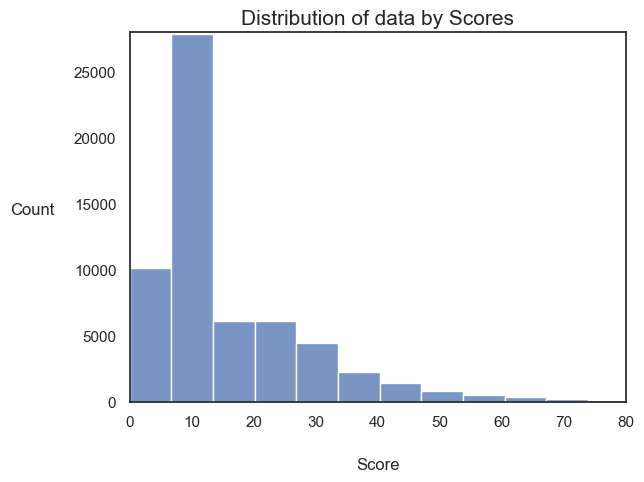

In [7]:
e.data_distribution(ny)

# Q-1. **What are the top 20 businesses in the NY Health Inspections dataset?**

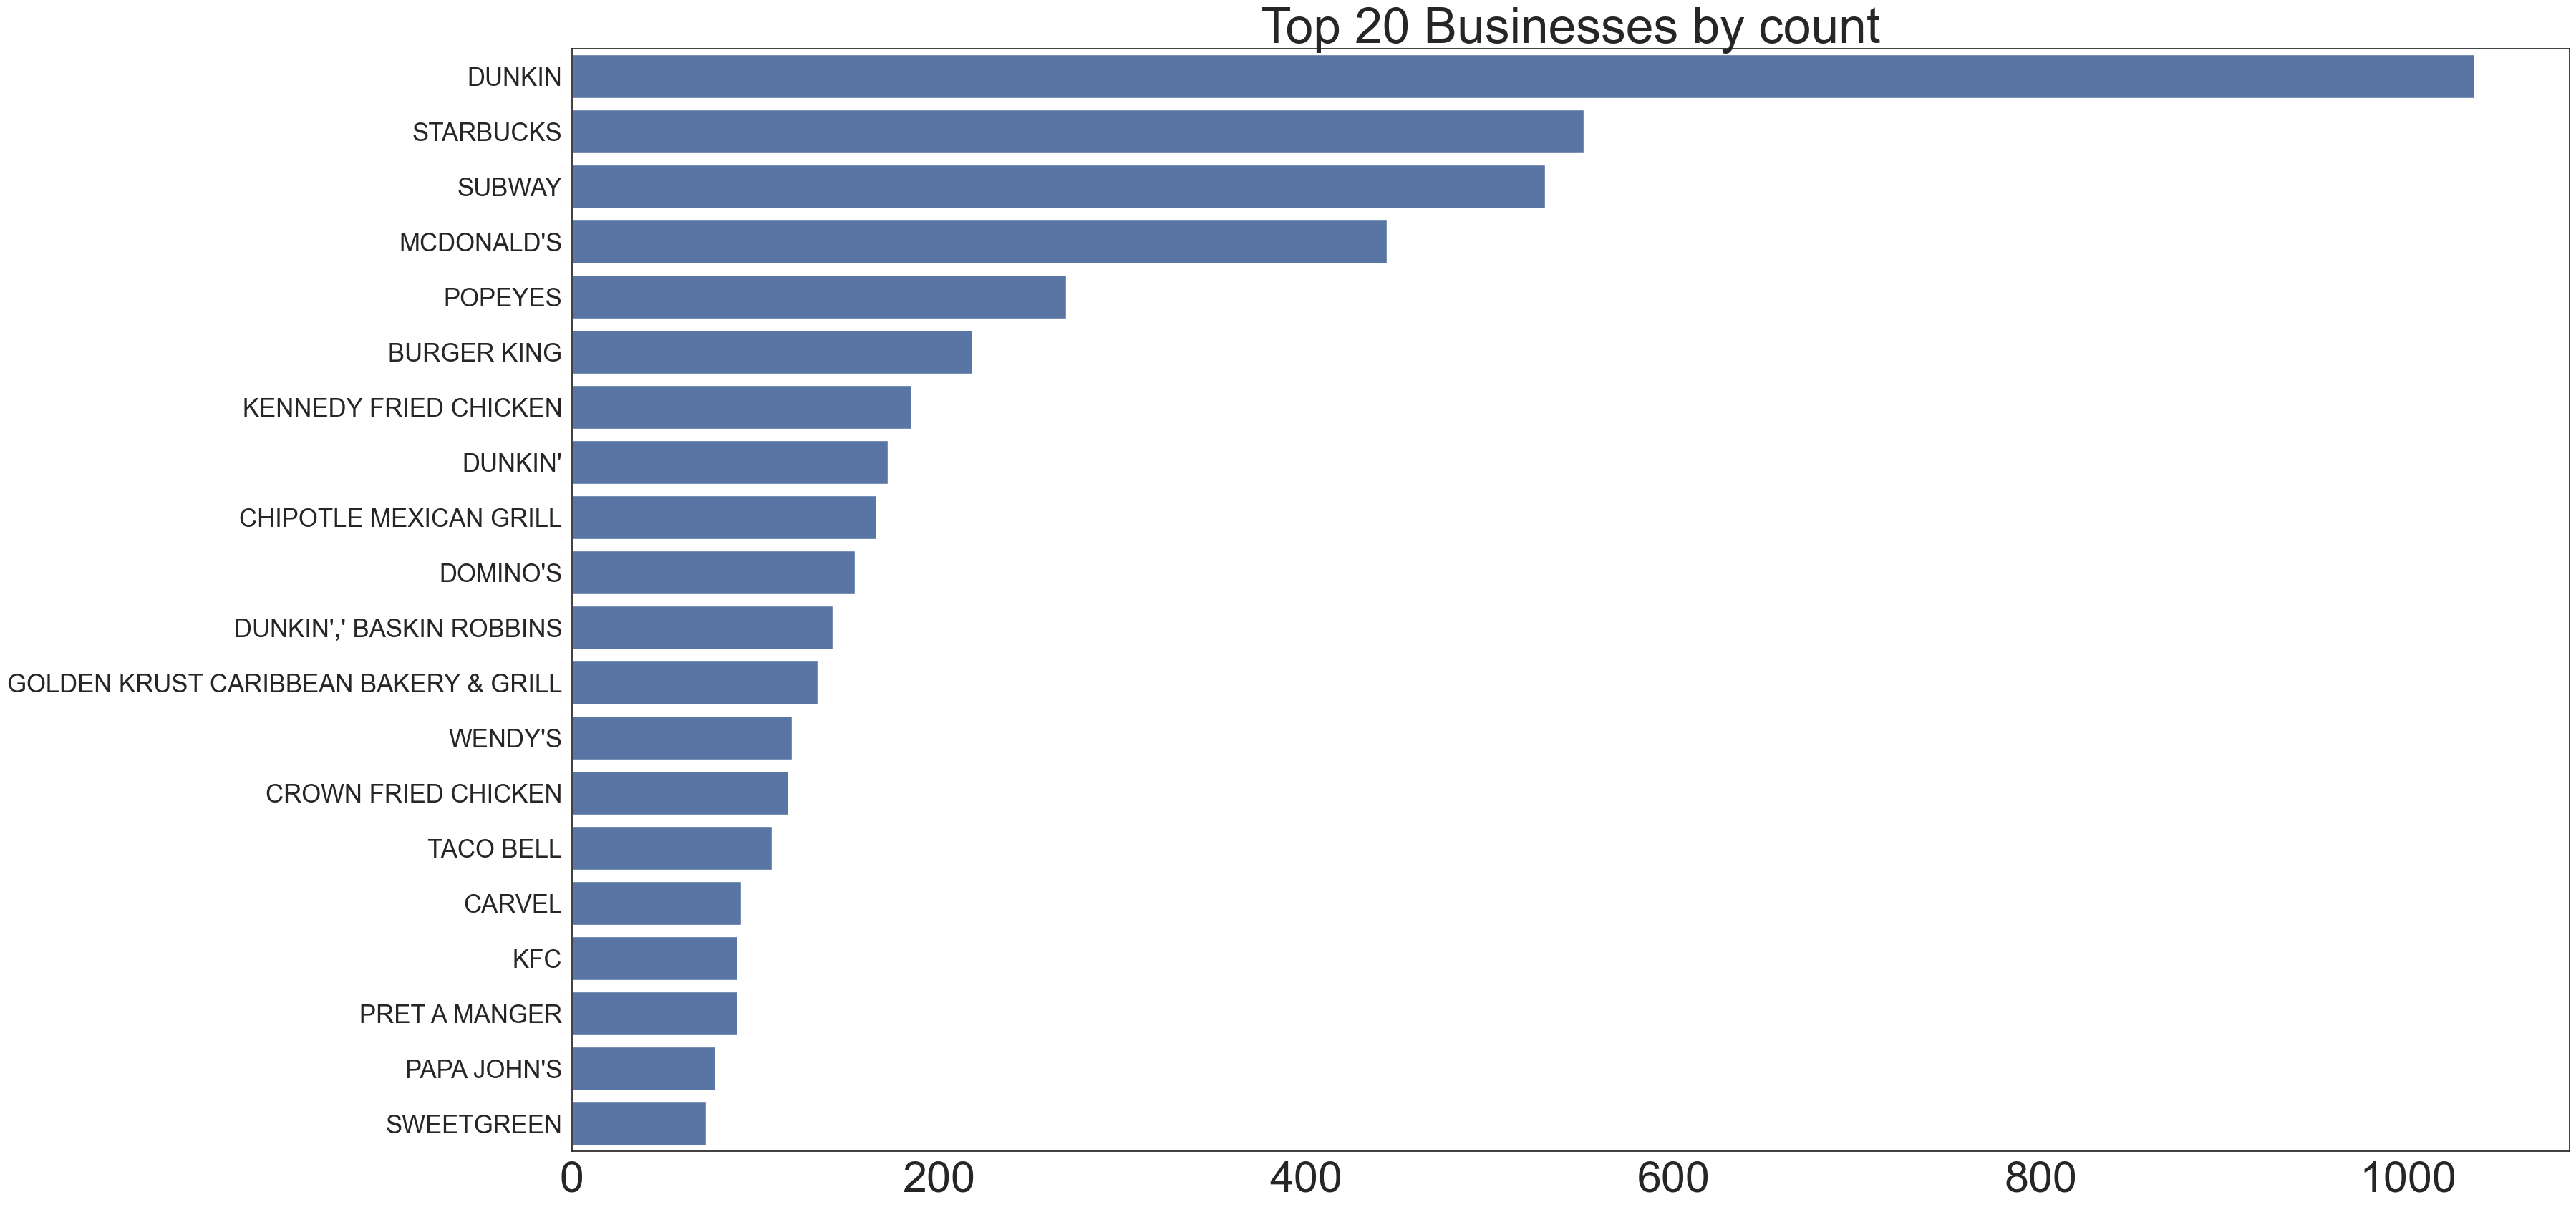

In [8]:
e.visual_1(ny)

  ## Takeaway: 
    
- **Organized by unique camis_id (unique business ids); Dunkin, Dunkin', and Dunkin'/other businesses attached or combined seems to come up the most in our top 20 listing.**

# Q-2. What were the top 20 cuisine descriptions listed on inspections?

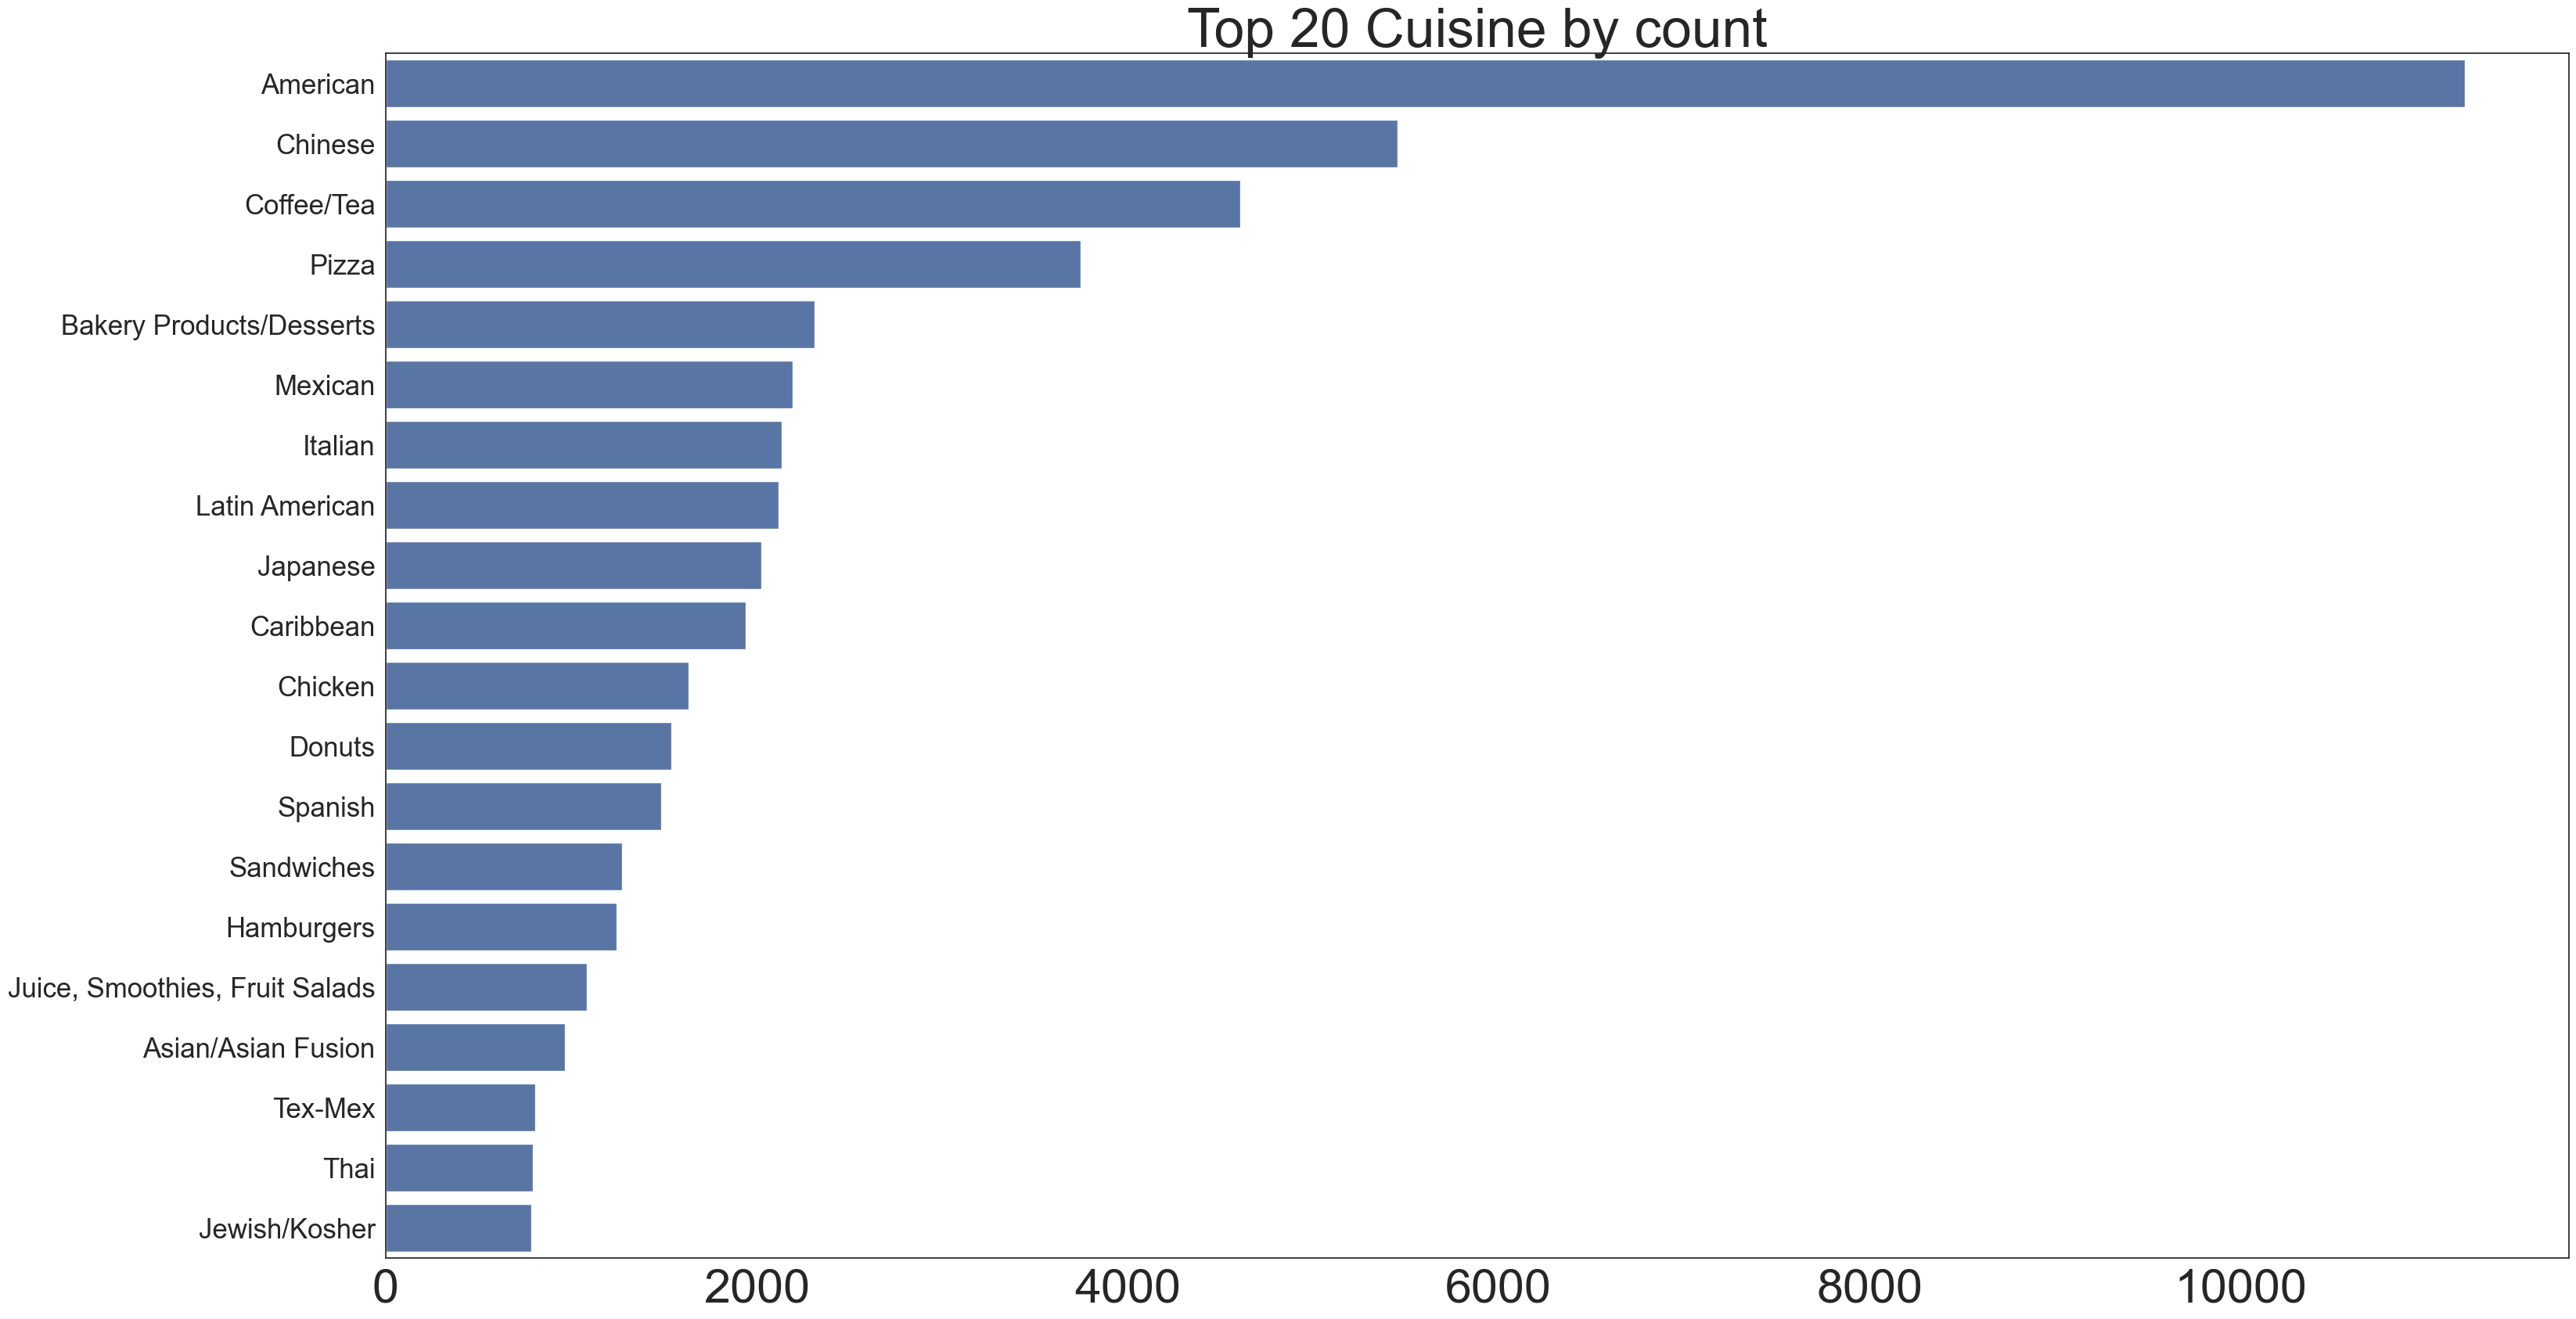

In [9]:
e.visual_2(ny)

  ## Takeaway: 
    
- **The top cuisine descriptions were annotated as American cuisine. However, it is worth noting that items such as sandwiches, hamburgers, or any single food items do not have a clear ethnic association, making this feature weak in terms of predicting grade or score outcomes.**

## Marc:

## ***After looking at the top failing scores across all boroughs and result actions taken by the health inspection we noted the biggest difference between 2 boroughs scores/outcomes decided to conduct and independent t-test to determine is there is a significant difference between the Bronx and Queens.***

# Q-3. Based on the Top 20 failing business for the Bronx and Queens, is there a significant difference between the Bronx and Queens in terms of scores received and results ending with a citation or close actions?

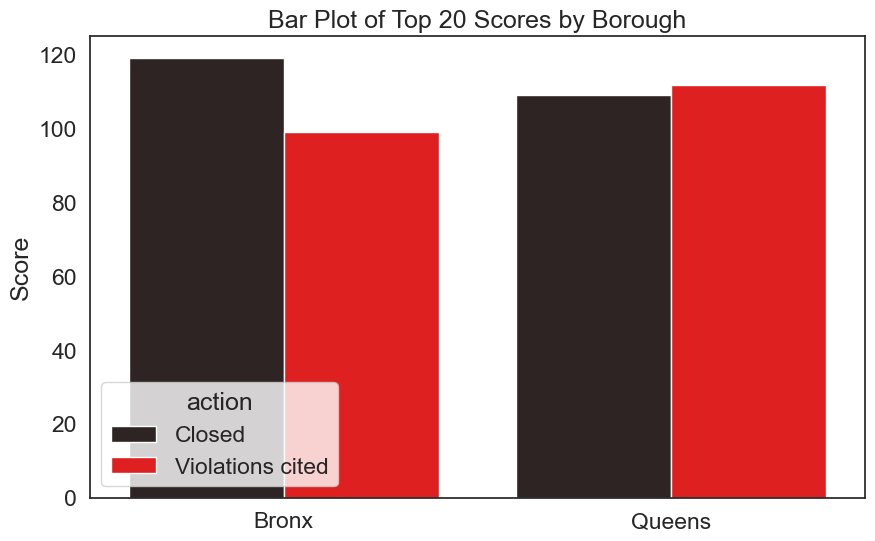



t-statistic: -1.938618517976592

Failed to reject the null hypothesis with a P-value of 0.06000178954876173

There is no significant difference in health inspection scores between the Bronx and Queens.


In [10]:
e.visual_3(ny)

  ## Takeaway: 
    
- **At first look across five borough there seems to be a difference between the Bronx and Queens, after only comparing both boroughs we can determine there is no significant difference in health inspection scores between the Bronx and Queens**

# Q-4. Is there a correlation between health inspection scores and health inspection dates over time?

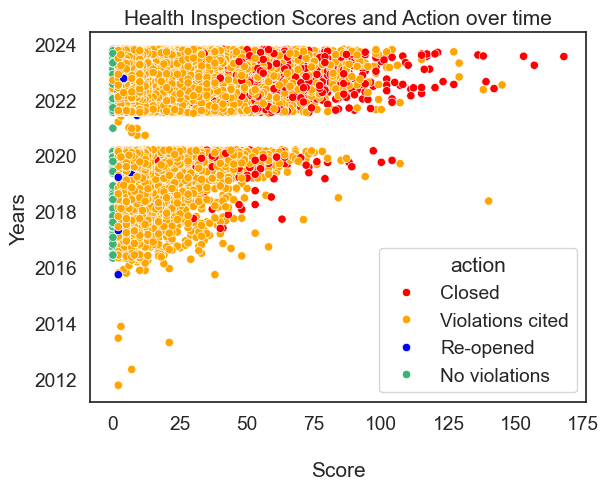



Pearson Correlation Coefficient: 0.10466576614509603

Rejected the null hypothesis with a P-value of 1.0079738929782607e-147.

There is a statistically significant correlation between inspection scores and inspection dates.


In [11]:
e.visual_4(ny)

  ## Takeaway: 
    
- **There appears to be a statistical correlation between scores and inspection dates over time. We can also see how there are more closed businesses after inspection in recent time and only a handful of business seem to be re-opened after a failed inspection. These features show there may be promising results when trying to predict scores, but covid pandemic gap may lead it to not be an impactful feature for modeling.**
<br>
  
- ***Note:*** ***There is gap from 2020 to 2021 which is due to the COVID-19 Pandemic.***

## NYC Health Inspection Explore Summary:
- **Dunkin Donuts are among the highest counted businesses with health inspections.**  
- **In cuisine-description for New York is mostly composed of "American". There are descriptions without a clear ethnic association which may make this feature weak.**  
- **There is no significant difference between the top 20 businesses with high (failing scores) that were associated with a closed or violation cited action**  
- **There is a statistical correlation between health inspection scores and dates.**

## Appending additional data scraped (Reviews and Census data)

In [12]:
reviews = pd.read_csv('reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61337 entries, 0 to 61336
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   camis          61337 non-null  int64 
 1   publish_time   61337 non-null  object
 2   review_text    54434 non-null  object
 3   review_rating  61337 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [13]:
s, a = pd.read_csv('scraped_reviews.csv'), pd.read_csv('reviews_progress.csv')

In [14]:
a.head()

,camis,place_id,review_id,review_relative_time,review_rating,review_text,review_language,author_display_name,contributor_id,author_photo_uri,publish_time
0,41168748,ChIJNzTkzav1wokRg3R8aGzuiWI,ChdDSUhNMG9nS0VJQ0FnSURHd09qaWxBRRAB,a year ago,5,These Guys are really professional. Well behav...,en,Md Omar Faruk,113263009121414123208,https://lh3.googleusercontent.com/a-/ALV-UjWGD...,2021-11-14T20:50:12Z
1,41168748,ChIJNzTkzav1wokRg3R8aGzuiWI,ChdDSUhNMG9nS0VJQ0FnSUMyMzlTUXpnRRAB,a year ago,1,I haven't had Dunkin Donuts in years. Being th...,en,Hipolito Rivera,102916427998123407326,https://lh3.googleusercontent.com/a-/ALV-UjUN8...,2022-05-02T09:47:34Z
2,41168748,ChIJNzTkzav1wokRg3R8aGzuiWI,ChdDSUhNMG9nS0VJQ0FnSURrN2VDU3RRRRAB,2 years ago,5,"This Dunkin is nice, but it's located inside a...",en,DeeAnn Phillips,104489576491114386805,https://lh3.googleusercontent.com/a/ACg8ocL6Fa...,2021-05-22T23:23:44Z
3,41168748,ChIJNzTkzav1wokRg3R8aGzuiWI,ChdDSUhNMG9nS0VJQ0FnSURhZ3JtNDV3RRAB,2 years ago,2,Ordered a box of joes they tried to cheat with...,en,Kel Ar,113775708780393704509,https://lh3.googleusercontent.com/a/ACg8ocLEUB...,2021-08-17T02:55:05Z
4,41168748,ChIJNzTkzav1wokRg3R8aGzuiWI,ChdDSUhNMG9nS0VJQ0FnSURobXM3VTRBRRAB,7 months ago,4,Another review my daughter and friends love ...,en,gman garcia (renew),117932626366586869052,https://lh3.googleusercontent.com/a/ACg8ocLcc0...,2023-03-06T16:17:03Z


In [15]:
s.head()

,id,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,url_user,r_additional
0,41375676,ChZDSUhNMG9nS0VJQ0FnSUNGMDhHSkVnEAE,NaN,11 hours ago,2023-11-02 02:44:04.226505,5.0,Eddie Trujillo,1,https://www.google.com/maps/contrib/1064176602...,"['Service: 5', 'Atmosphere: 5']"
1,41375676,ChdDSUhNMG9nS0VJQ0FnSUNGM2NhcGpnRRAB,NaN,a day ago,2023-11-02 02:44:04.227451,5.0,Mahamadou Asouman,0,https://www.google.com/maps/contrib/1078602531...,"['Service: 5', 'Atmosphere: 5']"
2,41375676,ChdDSUhNMG9nS0VJQ0FnSUNGbmVidnRRRRAB,NaN,a day ago,2023-11-02 02:44:04.227954,5.0,sedjnie ritoe,0,https://www.google.com/maps/contrib/1170344005...,[]
3,41375676,ChZDSUhNMG9nS0VJQ0FnSUNGNmY2Q0F3EAE,Fabulous food,4 days ago,2023-11-02 02:44:04.228882,5.0,Vibhuti Gedela,20,https://www.google.com/maps/contrib/1161880486...,"['Service Dine in', 'Meal type Dinner', 'Price..."
4,41375676,ChZDSUhNMG9nS0VJQ0FnSUNGNmZEdEVnEAE,"Overrated. Terrible service, the fault of the...",4 days ago,2023-11-02 02:44:04.229576,3.0,Giulia Passaniti,107,https://www.google.com/maps/contrib/1061104226...,[]


In [17]:
s.relative_date

0        11 hours ago
1           a day ago
2           a day ago
3          4 days ago
4          4 days ago
             ...     
17460    2 months ago
17461    2 months ago
17462    2 months ago
17463    3 months ago
17464    4 months ago
Name: relative_date, Length: 17465, dtype: object

In [16]:
p.cleanse_reviews(s, a)

AttributeError: 'DataFrame' object has no attribute 'relative_date'

In [ ]:
reviews.info()

In [ ]:
reviews.publish_time

In [ ]:
reviews.publish_time.iloc[17464]

In [ ]:
pd.to_datetime(reviews.publish_time)

In [ ]:
reviews.nunique()

In [ ]:
ny.info()

In [ ]:
ny.camis.value

## Census dataframe work

In [ ]:
# census = pd.read_csv('ny_demographic_data.csv', index_col=0)
# census.info()


In [ ]:
# census.head()

In [ ]:
# census = census.drop(columns='NAME')
# census = census.rename(columns={'B01003_001E' : 'total_population', 'C02003_003E' : 'caucassian', 'C02003_004E' : 'african_american', 'C02003_005E' : 'native_american', 'C02003_006E' : 'asian', 'zip code tabulation area' : 'zipcode'}) 
# census.head(2)

In [ ]:
# census.zipcode.value_counts()

In [ ]:
# census_zipcodes = census.zipcode

In [ ]:
#ny[ny['zipcode'] != 0]

In [ ]:
# ny = ny[ny['zipcode'] != 0]
# ny.zipcode.value_counts()

In [ ]:
# unique_zipcodes_list = ny['zipcode'].unique().tolist()
# len(unique_zipcodes_list)

In [ ]:
# ny.zipcode.drop_duplicates()

In [ ]:
# health_zipcodes = ny.zipcode

In [ ]:
# unique_health_zipcodes = health_zipcodes[~health_zipcodes.isin(census_zipcodes)]
# unique_census_zipcodes = census_zipcodes[~census_zipcodes.isin(health_zipcodes)]


In [ ]:
# unique_health_zipcodes.value_counts()

In [ ]:
# unique_census_zipcodes

In [ ]:
# 220 - 197

# Modeling

In [1]:
import acquire as a
import prepare as p
import model as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ny_reviews = p.acquire_ny_reviews()

ny_reviews.csv found!


In [3]:
ny_reviews = ny_reviews.dropna()

In [4]:
ny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4070 entries, 0 to 4097
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  4070 non-null   int64  
 1   dba                    4070 non-null   object 
 2   boro                   4070 non-null   object 
 3   phone                  4070 non-null   int64  
 4   inspection_date        4070 non-null   object 
 5   latitude               4070 non-null   float64
 6   longitude              4070 non-null   float64
 7   cuisine_description    4070 non-null   object 
 8   action                 4070 non-null   object 
 9   score                  4070 non-null   int64  
 10  grade                  4070 non-null   object 
 11  full_address           4070 non-null   object 
 12  violation_code         4070 non-null   object 
 13  violation_description  4070 non-null   object 
 14  last_inspection_date   4070 non-null   object 
 15  reviews  

In [5]:
ny_reviews.grade.value_counts()

grade
A    2392
B     970
C     708
Name: count, dtype: int64

In [6]:
grademap = {'A': 'Pass', 'B': 'pass', 'C': 'Fail'}

ny_reviews['grade'] = ny_reviews['grade'].map(grademap)

In [7]:
ny_reviews = ny_reviews[['grade', 'reviews']]

In [8]:
ny_reviews.head()

,grade,reviews
0,Fail,authentic place point needed lot help managed ...
1,pass,really great classic chinese comfort food grea...
2,Fail,great spot cheap eats didnt time take photo wa...
3,Fail,great place home cooking friendly delicious ca...
4,Fail,great dim sum cafe open early popular place fa...


In [9]:
ny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4070 entries, 0 to 4097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   grade    4070 non-null   object
 1   reviews  4070 non-null   object
dtypes: object(2)
memory usage: 95.4+ KB


In [10]:
ny_reviews.columns.to_list()

['grade', 'reviews']

# Predicting Fail
-------

# Baseline Model 

In [1]:
import model as m
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [3]:
m.baseline()


Baseline Model (Minority Class)

Train Accuracy: 17.37%


Validation Accuracy: 17.87%


Classification Report for Training Set:
              precision    recall  f1-score   support

        Fail       0.17      1.00      0.30       495
        Pass       0.00      0.00      0.00      2354

    accuracy                           0.17      2849
   macro avg       0.09      0.50      0.15      2849
weighted avg       0.03      0.17      0.05      2849



Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fail       0.18      1.00      0.30       109
        Pass       0.00      0.00      0.00       501

    accuracy                           0.18       610
   macro avg       0.09      0.50      0.15       610
weighted avg       0.03      0.18      0.05       610




# Logistic Regression Model

In [4]:
m.model_1()


Logisitic Regression Model

Train Accuracy: 0.83


Validation Accuracy: 0.82


Classification Report for Training Set:
              precision    recall  f1-score   support

        Fail       1.00      0.00      0.00       495
        Pass       0.83      1.00      0.91      2354

    accuracy                           0.83      2849
   macro avg       0.91      0.50      0.45      2849
weighted avg       0.86      0.83      0.75      2849



Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00       109
        Pass       0.82      1.00      0.90       501

    accuracy                           0.82       610
   macro avg       0.41      0.50      0.45       610
weighted avg       0.67      0.82      0.74       610




# KNN Classifier

In [5]:
m.model_2()


KNearest Neighbors (Hyperparameters Used)

Train Accuracy: 1.00


Validation Accuracy: 0.75


Classification Report for Training Set:
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00       495
        Pass       1.00      1.00      1.00      2354

    accuracy                           1.00      2849
   macro avg       1.00      1.00      1.00      2849
weighted avg       1.00      1.00      1.00      2849



Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fail       0.21      0.14      0.17       109
        Pass       0.83      0.89      0.86       501

    accuracy                           0.75       610
   macro avg       0.52      0.51      0.51       610
weighted avg       0.72      0.75      0.73       610




# XGBClassifier (Hyperparameters)

In [6]:
m.model_3()


XGBClassifier Model (Hyperparameters Used)

Train Accuracy: 0.89


Validation Accuracy: 0.81


Classification Report for Training Set:
              precision    recall  f1-score   support

        Fail       1.00      0.34      0.51       495
        Pass       0.88      1.00      0.94      2354

    accuracy                           0.89      2849
   macro avg       0.94      0.67      0.72      2849
weighted avg       0.90      0.89      0.86      2849



Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fail       0.27      0.03      0.05       109
        Pass       0.82      0.98      0.90       501

    accuracy                           0.81       610
   macro avg       0.55      0.51      0.47       610
weighted avg       0.72      0.81      0.75       610




# Logistic Regression (Hyperparameters)

In [7]:
m.model_4()


Logisitic Regression Model (Hyperparameters Used)

Train Accuracy: 0.85


Validation Accuracy: 0.65


Classification Report for Training Set:
              precision    recall  f1-score   support

        Fail       0.54      0.96      0.69       495
        Pass       0.99      0.83      0.90      2354

    accuracy                           0.85      2849
   macro avg       0.76      0.89      0.79      2849
weighted avg       0.91      0.85      0.86      2849



Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fail       0.25      0.47      0.32       109
        Pass       0.86      0.69      0.77       501

    accuracy                           0.65       610
   macro avg       0.55      0.58      0.55       610
weighted avg       0.75      0.65      0.69       610




# Random Forest / Gradient Boosting

In [ ]:
m.model_5()